# Exploratory Data Analysis

This notebook contains the EDA for the NLP Support Pipeline.

In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))


from src.data.dataset import load_data

data_path = "../src/data/dataset.csv"
df = load_data(data_path)
df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [2]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8'],
      dtype='str')

In [3]:
df.isnull().sum()

subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [4]:
df.describe()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
count,18539,19998,19996,20000,20000,20000,20000,20000,19954,19905,18461,13091,7351,3928,1907
unique,18539,19998,19996,4,10,3,2,148,204,344,481,578,566,492,386
top,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,Technical Support,medium,en,Technical,Performance,IT,Tech Support,Tech Support,Resolution,Resolution,Documentation
freq,1,1,1,7978,5824,8144,11923,5034,2795,3309,3436,2287,841,417,162


In [5]:
df = df.dropna(subset=['body'])
df['subject'] = df['subject'].fillna('')

tag_cols = [f'tag_{i}' for i in range(1, 9)]
for col in tag_cols:
    df[col] = df[col].fillna('no_tag')

df['answer'] = df['answer'].fillna('no_answer')


In [6]:
df.isnull().sum()

subject     0
body        0
answer      0
type        0
queue       0
priority    0
language    0
tag_1       0
tag_2       0
tag_3       0
tag_4       0
tag_5       0
tag_6       0
tag_7       0
tag_8       0
dtype: int64

In [7]:
df['type'].unique()

<StringArray>
['Incident', 'Request', 'Problem', 'Change']
Length: 4, dtype: str

In [8]:
import pandas as pd

counts = df["type"].value_counts()
percentages = df["type"].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
  "Count": counts,
  "Percentage (%)": percentages.round(2)
})

dist_df

,Count,Percentage (%)
type,,
Incident,7977,39.89
Request,5763,28.82
Problem,4183,20.92
Change,2075,10.38


In [9]:
df['queue'].unique()

counts = df["queue"].value_counts()
percentages = df["queue"].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
  "Count": counts,
  "Percentage (%)": percentages.round(2)
})

dist_df

,Count,Percentage (%)
queue,,
Technical Support,5824,29.12
Product Support,3706,18.53
Customer Service,3152,15.76
IT Support,2292,11.46
Billing and Payments,2086,10.43
Returns and Exchanges,1001,5.01
Service Outages and Maintenance,764,3.82
Sales and Pre-Sales,572,2.86
Human Resources,338,1.69


In [10]:
df['priority'].unique()

counts = df["priority"].value_counts()
percentages = df["priority"].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
  "Count": counts,
  "Percentage (%)": percentages.round(2)
})

dist_df

,Count,Percentage (%)
priority,,
medium,8142,40.71
high,7801,39.01
low,4055,20.28


In [11]:
df['language'].unique()

counts = df["language"].value_counts()
percentages = df["language"].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
  "Count": counts,
  "Percentage (%)": percentages.round(2)
})

dist_df

,Count,Percentage (%)
language,,
en,11922,59.62
de,8076,40.38


In [12]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_report = pd.DataFrame({'Missing Values': null_counts, 'Percentage (%)': null_percentages})
print(null_report)

          Missing Values  Percentage (%)
subject                0             0.0
body                   0             0.0
answer                 0             0.0
type                   0             0.0
queue                  0             0.0
priority               0             0.0
language               0             0.0
tag_1                  0             0.0
tag_2                  0             0.0
tag_3                  0             0.0
tag_4                  0             0.0
tag_5                  0             0.0
tag_6                  0             0.0
tag_7                  0             0.0
tag_8                  0             0.0


### NLP Preprocessing

In [13]:
df['text_raw'] = df['subject'] + " " + df['body']

print(df[['text_raw']].head(3))

                                            text_raw
0  Unvorhergesehener Absturz der Datenanalyse-Pla...
1  Customer Support Inquiry Seeking information o...
2  Data Analytics for Investment I am contacting ...


In [14]:
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words_dict = {
    'en': set(stopwords.words('english')),
    'de': set(stopwords.words('german'))
}

def clean_multilingual_text(row):
    # NORMALIZATION (LOWERCASE)
    text = str(row['text_raw']).lower()

    lang = str(row['language']).strip().lower()
    stops = stop_words_dict.get(lang, stop_words_dict['en'])

    # PUNCTUATION REMOVAL
    text = re.sub(r'[^a-zäöüß\s]', '', text)

    # TOKENIZATION
    tokens = word_tokenize(text)

    # STOPWORD REMOVAL
    cleaned = [w for w in tokens if w not in stops and len(w) > 2]

    return " ".join(cleaned)

df['text_clean'] = df.apply(clean_multilingual_text, axis=1)

[nltk_data] Downloading package punkt to /home/hassan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/hassan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df["text_clean"]

0        unvorhergesehener absturz datenanalyseplattfor...
1        customer support inquiry seeking information d...
2        data analytics investment contacting request i...
3        krankenhausdienstleistungproblem mediendatensp...
4        security dear customer support reaching inquir...
                               ...                        
19995    assistance needed ifttt docker integration fac...
19996    bitten unterstützung integration geehrte kunde...
19997    hello customer support inquiring billing optio...
19998    hilfe digitalen strategieproblemen qualität un...
19999    optimierung datenanalyseplattform erleichtern ...
Name: text_clean, Length: 19998, dtype: str

In [16]:

features = ['text_clean', 'priority', 'queue', 'language', 'tag_1', 'tag_2', 'tag_3']
target = 'type'

df = df[features + [target]].copy()

print("Final Columns selected:", df.columns.tolist())
print(df.head())

Final Columns selected: ['text_clean', 'priority', 'queue', 'language', 'tag_1', 'tag_2', 'tag_3', 'type']
                                          text_clean priority  \
0  unvorhergesehener absturz datenanalyseplattfor...      low   
1  customer support inquiry seeking information d...   medium   
2  data analytics investment contacting request i...   medium   
3  krankenhausdienstleistungproblem mediendatensp...     high   
4  security dear customer support reaching inquir...   medium   

              queue language      tag_1      tag_2       tag_3      type  
0   General Inquiry       de      Crash  Technical         Bug  Incident  
1  Customer Service       en   Feedback      Sales          IT   Request  
2  Customer Service       en  Technical    Product    Guidance   Request  
3  Customer Service       de   Security     Breach       Login  Incident  
4  Customer Service       en   Security   Customer  Compliance   Request  


In [17]:
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

print("Generating embeddings... this might take a minute.")
embeddings = model.encode(df['text_clean'].tolist(), show_progress_bar=True)

norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
embeddings_normalized = embeddings / norms

print(f"Embeddings shape: {embeddings_normalized.shape}")

/home/hassan/Desktop/project/simplon/nlp-support-pipeline-mlops/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hassan/Desktop/project/simplon/nlp-support-pipeline-mlops/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:184: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._cuda_getDeviceCount() > 0
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 1864.89it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key     

Generating embeddings... this might take a minute.


Batches: 100%|██████████| 625/625 [04:52<00:00,  2.14it/s]

Embeddings shape: (19998, 384)


In [ ]:
import chromadb

client = chromadb.PersistentClient(path="./ticket_vector_db")

collection = client.get_or_create_collection(name="support_tickets")

metadata_list = df[['priority', 'queue', 'language', 'tag_1', 'tag_2', 'tag_3', 'type']].to_dict('records')
ids_list = [str(i) for i in range(len(df))]
documents_list = df['text_clean'].tolist()
embeddings_list = embeddings_normalized.tolist()

batch_size = 5000
total_records = len(df)

print(f"Starting upload of {total_records} records in batches...")

for i in range(0, total_records, batch_size):
    end_idx = min(i + batch_size, total_records)

    batch_ids = ids_list[i:end_idx]
    batch_embeddings = embeddings_list[i:end_idx]
    batch_metadata = metadata_list[i:end_idx]
    batch_documents = documents_list[i:end_idx]

    collection.add(
        ids=batch_ids,
        embeddings=batch_embeddings,
        metadatas=batch_metadata,
        documents=batch_documents
    )

    print(f"Successfully indexed records {i} to {end_idx}")

print("Indexation complete!")

Starting upload of 19998 records in batches...
Successfully indexed records 0 to 5000
Successfully indexed records 5000 to 10000
Successfully indexed records 10000 to 15000
Successfully indexed records 15000 to 19998
Indexation complete!


In [19]:
print(f"Total count in collection: {collection.count()}")

Total count in collection: 19998


### Model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['type'])

X = embeddings_normalized

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', max_iter=1000)

clf.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


              precision    recall  f1-score   support

      Change       0.93      0.78      0.85       415
    Incident       0.69      0.90      0.78      1595
     Problem       0.57      0.23      0.33       837
     Request       0.92      0.98      0.95      1153

    accuracy                           0.77      4000
   macro avg       0.78      0.72      0.73      4000
weighted avg       0.76      0.77      0.74      4000



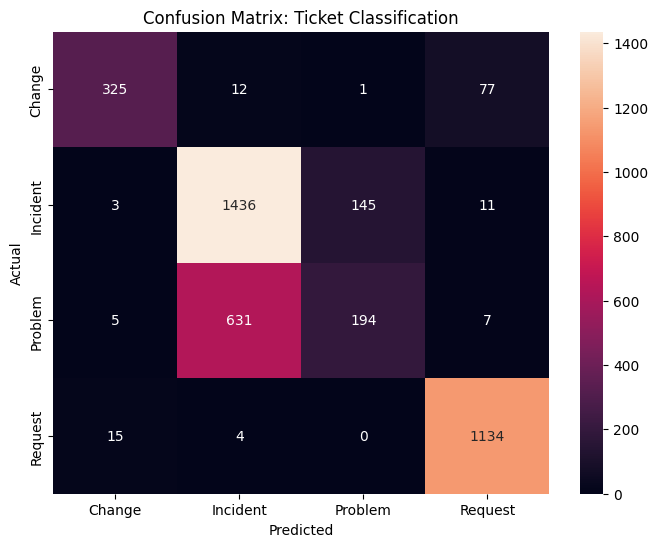

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Ticket Classification')
plt.show()